# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [5]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [6]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/UCBerkeley/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

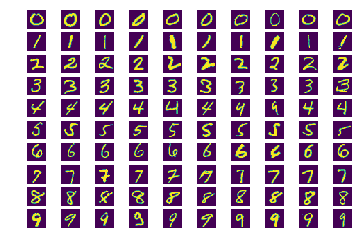

In [8]:
def P1(num_examples=10):
    
### STUDENT START ###
    
    plt.rc('lines',linewidth=2,color='b')
    
    # Loop from 0 through 9, extracting/displaying example digits
    for ex_digit in range(0,10):
        ex_count = 0
        
        # Loop through training labels display examples matching ex_digit
        for ind in range(0,len(mini_train_labels)+1):
            y = mini_train_labels[ind]
            if y == ex_digit:
                x = mini_train_data[ind]
                x = np.array(x)
                x_img = x.reshape((28,28))
                
                # Create a subplot for each example image, with image index increasing left-to-right, top-to-botton
                plt.subplot(10,num_examples,(ex_digit*10)+ex_count+1)

                # Display an example digit image and turn off the pixel tick marks
                plt.imshow(x_img)
                plt.axis('off')
                
                ex_count+= 1
                if ex_count == 10:
                    break            
    
    plt.show()        
            
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [9]:
def P2(k_values):

### STUDENT START ###

    # For each input k values, fit a K_nearest_neighbors classifier, report on accuracy.
    for k in k_values:
        
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(mini_train_data, mini_train_labels)
        
        pred = classifier.predict(dev_data)
        
        pred = np.array(pred)
        
        score = classifier.score(dev_data, dev_labels)

        print("For k={}, accuracy={}".format(k, score))
        
        # For k=1, produce classification report with precision, recall and F1
        if (k==1):
            class_report = classification_report(pred, dev_labels)
            print(class_report)
        
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

For k=1, accuracy=0.888
             precision    recall  f1-score   support

        0.0       0.98      0.91      0.94       107
        1.0       1.00      0.89      0.94       118
        2.0       0.79      0.99      0.88        82
        3.0       0.87      0.77      0.82        97
        4.0       0.82      0.89      0.85        96
        5.0       0.84      0.93      0.88        82
        6.0       0.96      0.94      0.95       100
        7.0       0.92      0.89      0.90       117
        8.0       0.88      0.94      0.91        89
        9.0       0.82      0.78      0.80       112

avg / total       0.89      0.89      0.89      1000

For k=3, accuracy=0.878
For k=5, accuracy=0.869
For k=7, accuracy=0.865
For k=9, accuracy=0.863


(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [10]:
def P3(train_sizes):

### STUDENT START ###

    # Reference global list variable accuracies, used to cache the data resulting from this method for other analysis
    global accuracies
    
    # Loop through the input train_sizes, fitting a k_nn model against the appropriate subset of training data
    for size in train_sizes:
        
        subset_train_data = mini_train_data[:size]
        subset_train_labels = mini_train_labels[:size]
        
        classifier = KNeighborsClassifier(n_neighbors=1)
        classifier.fit(subset_train_data, subset_train_labels)
        
        # Start the timer, run the prediction, then stop the timer
        start_time = time.time()
        pred = classifier.predict(dev_data)
        end_time = time.time()
        
        pred = np.array(pred)
        
        # Generate an accuracy score for this train_size and append to the collection
        score = classifier.score(dev_data, dev_labels)
        
        # Add this accuracy score to the list for returning
        accuracies.append(score)
        
        print("Train Size: {} Accuracy: {:.2f} Prediction Time: {:.2f} seconds".format(size, score, 
                                                                                       end_time-start_time))

# Create an empty list in which to collect and return accuracies for each of the the input train_sizes
accuracies = []

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
P3(train_sizes)

Train Size: 100 Accuracy: 0.72 Prediction Time: 0.09 seconds
Train Size: 200 Accuracy: 0.79 Prediction Time: 0.18 seconds
Train Size: 400 Accuracy: 0.84 Prediction Time: 0.38 seconds
Train Size: 800 Accuracy: 0.88 Prediction Time: 0.74 seconds
Train Size: 1600 Accuracy: 0.89 Prediction Time: 1.01 seconds
Train Size: 3200 Accuracy: 0.89 Prediction Time: 1.09 seconds
Train Size: 6400 Accuracy: 0.89 Prediction Time: 1.31 seconds
Train Size: 12800 Accuracy: 0.89 Prediction Time: 1.23 seconds
Train Size: 25000 Accuracy: 0.89 Prediction Time: 1.11 seconds


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [11]:
def P4():

### STUDENT START ###

    # This is a reference to the variable caching the results of P3, which will be used for this analysis
    global accuracies

    train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]

    if (not accuracies):
        # Calculate accuracies for the train data sizes as demonstrated in P3
        P3(train_sizes)

    # Reshape the data based on having a single feature
    X = np.array(train_sizes)
    X = X.reshape(-1,1)
    y = np.array(accuracies)
    y = y.reshape(-1,1)
    
    # Fit a LinearRegression model with the collected data
    reg_model = LinearRegression()
    reg_model.fit(X=X, y=y)

    # Create an array with a single data point for n=60000
    pred_size = [[60000]]
    pred_size = np.array(pred_size)
    
    pred_accuracy = reg_model.predict(pred_size)
    pred_accuracy = np.array(pred_accuracy)
    pred_accuracy = pred_accuracy[0][0]*100

    print("Predicted Accuracy: {:.2f}%".format(pred_accuracy))
    
    print("\n\nAdding inverse of train_sizes as a predictor variable, to account for the asymptote at 100%")
    
    inverse_train_sizes = []
    for train_size in train_sizes:
        inverse_train_sizes.append(1.0/train_size)
    inverse_train_sizes = np.array(inverse_train_sizes)
    inverse_train_sizes = inverse_train_sizes.reshape(-1,1)
    
    X = np.concatenate((X, inverse_train_sizes), 1)   
    
    float_formatter = lambda x: "%.5f" % x
    np.set_printoptions(formatter={'float_kind':float_formatter})
    
    print("X with train sizes and inverse:\n {}".format(X))

    reg_model.fit(X=X, y=y)

    # Create an array with a single data point for n=60000
    pred_size_datapoint = pred_size[0]
    # The following adds a second feature to the test datapoint, the inverse of the train_size
    pred_size_datapoint = np.concatenate((pred_size_datapoint,[1/pred_size_datapoint[0]]))
    pred_size = [pred_size_datapoint]
    pred_size = np.array(pred_size)
    
    pred_accuracy = reg_model.predict(pred_size)
    pred_accuracy = np.array(pred_accuracy)
    pred_accuracy = pred_accuracy[0][0]*100

    print("Predicted Accuracy of adjusted model: {:.2f}%".format(pred_accuracy))



### STUDENT END ###

P4()

Predicted Accuracy: 102.15%


Adding inverse of train_sizes as a predictor variable, to account for the asymptote at 100%
X with train sizes and inverse:
 [[100.00000 0.01000]
 [200.00000 0.00500]
 [400.00000 0.00250]
 [800.00000 0.00125]
 [1600.00000 0.00063]
 [3200.00000 0.00031]
 [6400.00000 0.00016]
 [12800.00000 0.00008]
 [25000.00000 0.00004]]
Predicted Accuracy of adjusted model: 87.90%


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


ANSWER: With the one-feature model, the predicted accuracy was 102.15%, which is not a valid percentage value.  The issue resulting in this >100% accuracy prediction is that there is an asymptote at 100% which is not expressed in the original model. Added the inverse of the train_sizes feature as an additional feature to the model will address this problem, since dividing 1 by this increasing number has a built-in asymptote.

Note that the adjusted model with the extra feature produces a more reasonable prediction of 87.9% for the large training size.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix 

Confusion (n_n=1):


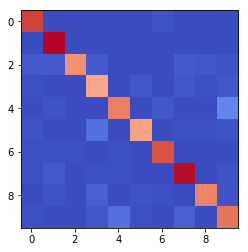

Min confusion: 0
Max confusion: 105


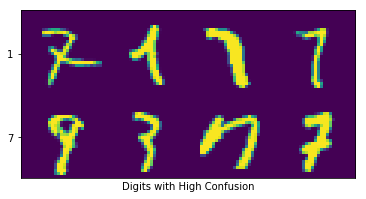

In [12]:
def P5():

### STUDENT START ###

    # identify digits with maximum confusion and create image containing examples of these digits
    examples_per_digit=4
    
    # This variable will be populated by the below function call with the identified example confused digits
    ex_digits = []
    examples = extract_confusing_examples(mini_train_data, mini_train_labels, 
                                          dev_data, dev_labels,
                                          ex_digits,
                                          examples_per_digit=4)

    # shape of displayed image will be several example images either labeled or predicted as each confusion
    # digit, one digit per row
    show_examples(examples, ex_digits, examples_per_digit)
    
    
def show_examples(examples, ex_digits, examples_per_digit):
    """Given an aggregate input image, a list of digits represented in the image and the number of examples per digit, display image with appropriate y tick marks
    Args:
        examples: An aggregate image with a row for each digit in ex_digits and the number of colums matching examples_per_digit
        ex_digits: A list of the digits represented by examples in the examples image. 
        examples_per_digit: The number of examples shown for each digit, each being in a separate column of the aggregate image.
    Returns:
        N/A
    Raises:
        N/A
    """      

    # Setup a new figure with the right number of columns and rows
    fig, ax = plt.subplots(1,1,sharex=True, sharey=True, 
                              gridspec_kw = {'wspace':0, 'hspace':0})

    # This will create array of tick positions, starting at 14 and incrementing by 28 each time 
    # to center each label left of each image row
    yticks = []
    for index in range(0,len(ex_digits)):
        yticks.append(index*28+14)
        
    ax.set_yticks(yticks)
    ax.set_yticklabels(ex_digits)

    ax.set_xticks([])
    ax.set_xlabel("Digits with High Confusion")

    # Display the image
    ax.imshow(examples)

def extract_confusing_examples(train_data_parm, train_labels_parm, 
                               devel_data_parm, devel_labels_parm, 
                               ex_digits, examples_per_digit,
                               n_neighbors=1):
    """Generates and displays a confusion matrix from training and dev data, returning examples of confused digit images
    Args:
        train_data_parm: A training dataset containing 28x28 pixel digit images
        train_labels_parm: Labels for the training dataset
        devel_data_parm: A development dataset containing 28x28 pixel digit images
        devel_labels_parm: Labels for the development dataset
        ex_digits: array to be populated with the identified example digits
        examples_per_digit: Number of confused digit examples to collect
        n_neighbors: Number of neighbors used in KNearestNeighborsClassifier
        ex_digits: array populated identified example digits
    Returns:
        An image collected from multiple examples, with one row per example digit and one column per example across digits
    Raises:
        N/A
    """       

    examples=[]
    
    # Note that this classifier is acting on the datasets and labels passed to this function, not the globals
    # Fit a k-nn classifier to the training data
    knn_class = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_class.fit(train_data_parm, train_labels_parm)

    # Generate a confusion matrix using the dev data
    pred = knn_class.predict(devel_data_parm)
    confusion = confusion_matrix(devel_labels_parm, pred)
    
    conf_max = max(np.nditer(confusion))
    conf_min = min(np.nditer(confusion))
    
    print("Confusion (n_n=1):")

    # Display the confusion matrix
    fig, ax = plt.subplots(1,1,sharex=True, sharey=True, 
                              gridspec_kw = {'wspace':0, 'hspace':0})
    ax.imshow(confusion, cmap='coolwarm', vmax=conf_max, vmin=conf_min)
    plt.show()
    
    print("Min confusion: {}".format(conf_min))
    print("Max confusion: {}".format(conf_max))
    
    # Find digits where calculated confusion was in the top 5%
    for digit in np.where(confusion>=.95*conf_max)[0]:
        ex_digits.append(digit)
        
    image_width = 28
    image_length = 28
    
    # Determine the number of rows (digits to display example mistakes)
    # And, display 5 example mistakes for each such digit (5 columns)
    digits = len(ex_digits)
    
    # pre-allocate array in which to collect example images
    examples = np.zeros((image_length*digits,image_width*examples_per_digit))
    
    # keep track of extracted indices
    extracted_indices = []
    
    # start with first digit
    digit_count = 0
    
    # iterate over the digits identified as being confusing
    for example_ind in range(0, len(ex_digits)):
        
        example_digit = ex_digits[example_ind]

        example_count = 0

        # Iterate through the dev_label indices,
        # locating and collecting the associated images from dev_data
        for label_ind in range(0,len(pred)):

            label_digit = devel_labels_parm[label_ind]
            predict_digit = pred[label_ind]
                
            # If we've already extracted this particular image for these examples, skip it this time
            if ((example_count<examples_per_digit) and (label_ind not in extracted_indices)):
                    
                # Check if this is a case of label vs prediction mismatch and either the label or prediction
                # matches the example digit
                if (((label_digit == example_digit) or (predict_digit == example_digit)) and
                    (label_digit != predict_digit)):

                    extracted_indices.append(label_ind)
                
                    #extract the actual image
                    x = devel_data_parm[label_ind]
                    x = np.array(x)
                    x = x.reshape(image_width,image_length)
            
                    # calculate destination start column and row within the collected image
                    start_column = example_count*image_width
                    end_column = start_column+image_width
                    start_row = example_ind*image_length
                    end_row = start_row+image_length
            
                    # copy the actual (mistaken prediction) image into the collected image
                    examples[start_row:end_row,start_column:end_column,] = x
                    
                    example_count+=1
                
                if (example_count == examples_per_digit):
                    break
                    
    # Having iterated over all columns and rows, extracting the nearest-8-neighbor max values,
    # return the resulting blurred image
    return examples

# Create these globals for caching of blurred datasets in P6()
blurred_train_data = None
blurred_dev_data = None

### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Blurring training data...
...Done blurring training data. (32.25 seconds total)
Blurring dev data...
...Done blurring dev data. (31.02 seconds total)


Digit confusion with blurred training data:
Confusion (n_n=1):


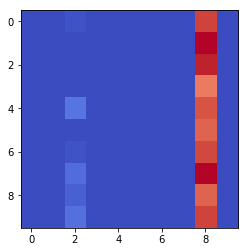

Min confusion: 0
Max confusion: 105


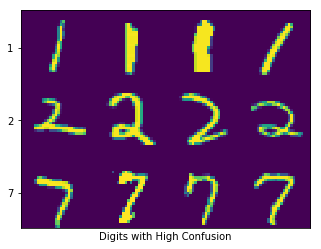



Digit confusion with blurred dev data:
Confusion (n_n=1):


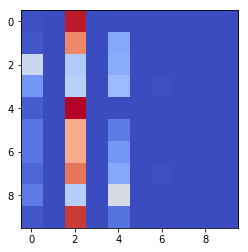

Min confusion: 0
Max confusion: 100


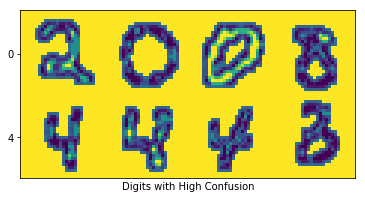



Digit confusion with both training data blurred and dev data blurred:
Confusion (n_n=1):


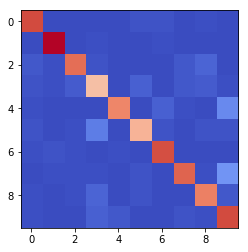

Min confusion: 0
Max confusion: 103


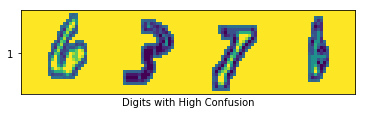

In [13]:
def P6():
    
### STUDENT START ###

    # Set these two blurred datasets as globals in order to cache them after blurring, not re-processing in later calls
    global blurred_train_data
    global blurred_dev_data
    
    if (blurred_train_data is None):
        # Make a blurred copy of the training data
        print("Blurring training data...")
    
        start_time = time.time();
        blurred_train_data = blur_data(mini_train_data)
        end_time = time.time();
        print("...Done blurring training data. ({0:.2f} seconds total)".format(end_time-start_time))

    if (blurred_dev_data is None):
        # Make a blurred copy of the training data
        print("Blurring dev data...")
    
        start_time = time.time();
        blurred_dev_data = blur_data(dev_data)
        end_time = time.time();
        print("...Done blurring dev data. ({0:.2f} seconds total)".format(end_time-start_time))
        
    
    # Show the confusion using the blurred training data and the original dev data
    print("\n\nDigit confusion with blurred training data:")
    
    ex_digits = []
    examples = extract_confusing_examples(blurred_train_data, mini_train_labels, 
                                          dev_data, dev_labels, ex_digits, 4)

    show_examples(examples, ex_digits, 4)

    plt.show()

    
    # Show the confusion using the blurred dev data and the original training data
    print("\n\nDigit confusion with blurred dev data:")
    
    ex_digits = []
    examples = extract_confusing_examples(mini_train_data, mini_train_labels, 
                                          blurred_dev_data, dev_labels, ex_digits, 4)

    show_examples(examples, ex_digits, 4)

    plt.show()

    # Show the confusion using the blurred dev data and the blurred training data
    print("\n\nDigit confusion with both training data blurred and dev data blurred:")

    ex_digits = []
    examples = extract_confusing_examples(blurred_train_data, mini_train_labels, 
                                          blurred_dev_data, dev_labels, ex_digits, 4)

    # Display the examples for confusion with both data sets blurred
    show_examples(examples, ex_digits, 4)
    
    plt.show()
    
     
def blur_data(img_data_arr):
    """Process an array of image data arrays, blurring each image and producing an output array containing the blurred images
    Args:
        img_data_arr: array of input image arras, the latter to be blurred
    Returns:
        An image produced by blurring the input mage using a weighted average of pixel neighbors
    Raises:
        N/A
    """   
    # First, create an empty image array to hold the blurred images
    blurred_data_arr = []
                                
    # Iterate through the images in the input array, adding a blurred version of each to the output array
    ind = 0
    for image in img_data_arr:
        blurred_image = blur_image(image)
        blurred_data_arr.append(blurred_image)
        ind+=1
    
    return np.array(blurred_data_arr)


def blur_image(img_arr):
    """Given an input image array, produce a blurred image by taking a weighted average of each pixel's 8 nearest neighbors
    Args:
        img_arr: input image to be blurred
    Returns:
        An image produced by blurring the input mage using a weighted average of pixel neighbors
    Raises:
        N/A
    """      
    # relative coordinates of neighbor pixels in image
    pixel_neighbors=[(-1,-1),(0,-1),(1,-1),
                     (-1,0),(1,0),
                     (-1,-1),(0,-1),(1,-1)]
    
    img_arr=np.array(img_arr)
    img_arr = img_arr.reshape(28,28)
    
    blurred_image = np.zeros((28,28))
    
    # Iterate through columns and rows, deriving a blurred image by taking 
    # the 8 nearest neighbors for each pixel position.
    for col in range(0,28):
        for row in range(0,28):
                
            neighbor_votes = {}
                
            # Give the pixel itself a vote (2 votes, actually, since weighted).
            pixel_val = img_arr[col,row]
            neighbor_votes[pixel_val] = 2
            
            # Iterate through the standard set of 8 neighbor relative coordinates,
            # collecting pixel values and occurrences (votes) for each.
            for neighbor_coords in pixel_neighbors:
                    
                n_col = col + neighbor_coords[0]
                n_row = row + neighbor_coords[1]
                    
                # if this neighbor would be past the left/right image borders
                if (n_col < 0) | (n_col > 27):
                    #bounce it over to the opposite side
                    n_col = col + -1*neighbor_coords[0]
                    
                # if this neighbor would be past the top/bottom image borders                                      
                if (n_row < 0) | (n_col > 27):
                    #bounce it over to the opposite vertical edge 
                    n_row = row + -1*neighbor_coords[1]            
                    
                # give the meighbor pixel a vote
                neighbor_pixel_val = img_arr[n_col,n_row]
                                      
                # check for a matching vote value
                if neighbor_pixel_val in neighbor_votes:
                    old_vote = neighbor_votes[neighbor_pixel_val]
                                      
                    # increase by 1
                    neighbor_votes[neighbor_pixel_val] = old_vote+1
                else:
                    # add neighbor's vote
                    neighbor_votes[neighbor_pixel_val] = 1
                
                max_vote = 0
                max_pixel_values = []
                                      
                # examine the votes from starting with most popular                      
                for pixel_value_vote in sorted(neighbor_votes.items(), 
                                               key=lambda item: (item[1],item[0]), 
                                               reverse=True):
                
                    # Extract the vote count and pixel value for this item
                    vote = pixel_value_vote[0]
                    pixel_value = pixel_value_vote[1]
                      
                    # if this is the first item with the maximum vote, save the pixel_value
                    if max_vote==0:
                        max_vote = vote
                        max_pixel_values.append(pixel_value)
                                      
                    # otherwise, if this item's vote is equal to the maximum vote, add it to the saved set
                    elif max_vote==vote:
                        max_pixel_values.append(pixel_value)
                    
                    # otherwise, this vote will be less than the maximum, so break out of the loop
                    else:
                        break
                
                max_pixel_values = np.array(max_pixel_values)
                result_pixel_value = 0
                                      
                # if there's only a single pixel_value with the maximum vote, it wins
                if len(max_pixel_values)==1:
                    result_pixel_value = max_pixel_values[0]
                else:
                    result_pixel_value = max_pixel_values.mean()
                                      
                blurred_image[col,row] = result_pixel_value
                
    blurred_image = blurred_image.flatten()
    
    return blurred_image
                            
### STUDENT END ###

P6()

ANSWER: It's interesting that blurring just the training data caused more confusion than blurring just the dev data. It's possible that the training data happened to have higher quality digit images and that blurring them caused a greater challenge with prediction than had I blurred the dev data instead. While there were three confused digits with just blurred training data, there were only two with just blurred dev data, and only one when both were blurred. Perhaps both sets being blurred gave enough abstraction to offset the lower-quality data in the dev data set, while at the same time giving the training data more features with which to match the dev data.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

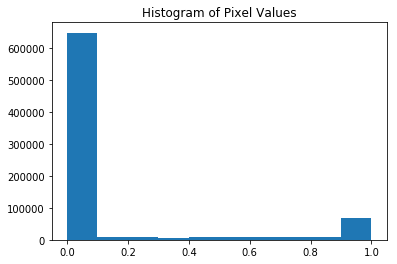

Dev Data Pixel Max: 1.0
Dev Data Pixel Min: 0.0
Dev Data Pixel Mean: 0.1305654261704682
Dev Data Pixel SD: 0.30823493148757114
BernouliiNB classifier accuracy: 0.817
MultinomialNB classifier acuracy: 0.807


In [14]:
def P7():

### STUDENT START ###
    dev_arr = np.array(dev_data)
    dev_arr = dev_arr.flatten()
    
    ax = plt.subplot(1,1,1)
    ax.set_title("Histogram of Pixel Values")
    ax.hist(dev_arr)
    plt.show()
    
    pixel_max = np.max(dev_arr)
    pixel_min = np.min(dev_arr)
    pixel_mean = np.mean(dev_arr)
    pixel_std = np.std(dev_arr)
    
    print("Dev Data Pixel Max: {}".format(pixel_max))
    print("Dev Data Pixel Min: {}".format(pixel_min))

    print("Dev Data Pixel Mean: {}".format(pixel_mean))
    print("Dev Data Pixel SD: {}".format(pixel_std))

    bnb_classifier = BernoulliNB(binarize=pixel_mean)
    bnb_classifier.fit(mini_train_data, mini_train_labels)
    accuracy = bnb_classifier.score(dev_data, dev_labels)
    print("BernouliiNB classifier accuracy: {}".format(accuracy))

    # Preprocess training data, mapping pixel values to 0, 1, 2
    multinom_train_arr = []
    for img_arr in mini_train_data:
        multinom_train_arr.append(map_multinom_pixels(img_arr, pixel_mean))

    # Preprocess dev data, mapping pixel values to 0, 1, 2
    multinom_dev_arr = []
    for img_arr in dev_data:
        multinom_dev_arr.append(map_multinom_pixels(img_arr, pixel_mean))

    mnb_classifier = MultinomialNB()    
    mnb_classifier.fit(multinom_train_arr, mini_train_labels)
    accuracy = mnb_classifier.score(multinom_dev_arr, dev_labels)
    print("MultinomialNB classifier acuracy: {}".format(accuracy))
    
    
    
def map_multinom_pixels(img_arr, pixel_mean):
    """Given an input image array, produce a transformed image with each pixel replaced by number 0, 1, or 2
    Args:
        img_arr: input image to use as source for multinomial pixel mapping.
    Returns:
        An image produced by mapping pixel values to one of three values, 0, 1, or 2
    Raises:
        N/A
    """      
    white_max = 0
    grey_max = pixel_mean
    
    mapped_arr = []
    for pixel in img_arr:
        
        # Pixel values below 1/3 of the maximum pixel value will be mapped to 0 (white)
        if pixel < white_max:
            mapped_arr.append(0)
            
        # Pixel values below 2/3 of the maximum pixel value (and greater than 1/3) will be mapped to grey (1)
        elif pixel < grey_max:
            mapped_arr.append(1)
        
        # All other pixel values will be mapped to black (2)
        else:
            mapped_arr.append(2)
            
    return mapped_arr
        
    
### STUDENT END ###

P7()

ANSWER: Note that the MultinomialNB classifier did not product higer accuracy than the BernoulliNB classifier with binarized data. This can be explained by the above histogram, which shows that although there is a long tail to the right, the pixel data is essentially cluster around the area between 0.0 and 0.1, which better fits a binarized approach.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [15]:
def P8(alphas):

### STUDENT START ###

    # Create a GridSearchCV instance with the input alphas dict as the parameters with which to measure accuracy
    gsCV = GridSearchCV(BernoulliNB(), alphas, scoring='accuracy')
    
    # Fit the data with the training data
    gsCV.fit(mini_train_data, mini_train_labels)
    
    zeroResults = gsCV.cv_results_['mean_test_score'][0]
    print("Alpha=0 Results")
    print(zeroResults)
    
    print("\nFull Cross-Validation Results:")
    resultsStr = format(gsCV.cv_results_, tab=1)
    print(resultsStr)
    
    # Return the results for examination of the best_params_ field
    return gsCV

def format(dict_arr, tab=0):
    """Process input dict array, producting readble, indented text
    Args:
        dict_arr: input image to be blurred
        tab: number of extra "tabs" to indent (each = 2 spaces)
    Returns:
        A string representation of the dict array, with legible indentation.
    Raises:
        N/A
    """  
    s = ['{\n']
    for k,v in dict_arr.items():
        if isinstance(v, dict):
            v = format(v, tab+1)
        else:
            v = repr(v)

        # This prints an indent of tab*(2 space) then the key and value
        s.append('%s%r: %s,\n' % ('  '*tab, k, v))
    s.append('%s}' % ('  '*tab))
    return ''.join(s)

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Users/burgew/Library/Python/3.6/lib/python/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/burgew/Library/Python/3.6/lib/python/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/burgew/Library/Python/3.6/lib/python/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha=0 Results
0.803

Full Cross-Validation Results:
{
  'mean_fit_time': array([0.00756, 0.00569, 0.00500, 0.00506, 0.00520, 0.00554, 0.00508,
       0.00502, 0.00523]),
  'std_fit_time': array([0.00228, 0.00057, 0.00034, 0.00020, 0.00017, 0.00045, 0.00016,
       0.00026, 0.00028]),
  'mean_score_time': array([0.00356, 0.00392, 0.00370, 0.00360, 0.00372, 0.00401, 0.00376,
       0.00367, 0.00360]),
  'std_score_time': array([0.00076, 0.00053, 0.00036, 0.00040, 0.00055, 0.00064, 0.00050,
       0.00044, 0.00037]),
  'param_alpha': masked_array(data=[0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object),
  'params': [{'alpha': 0.0}, {'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 0.5}, {'alpha': 1.0}, {'alpha': 2.0}, {'alpha': 10.0}],
  'split0_test_score': array([0.84320, 0.84911, 0.84911, 0.85503, 0.8550

In [16]:
print(nb.best_params_)

{'alpha': 0.1}


ANSWER:  The best value for alpha was determined to be 0.1. The mean_test_score in this case was 0.821. 
The mean_test_score for alpha=0 was 0.803, which is worse than  the accuracy I observed in P7 for the BernoulliNB, 0.817. This result may indicate more robust testing.



(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [17]:
def P9():

### STUDENT START ###

    gaussNB = GaussianNB()
    gaussNB.fit(mini_train_data, mini_train_labels)
    print("Un-adjusted GaussianNB accuracy on dev data: {}".format(gaussNB.score(dev_data,dev_labels)))
    
    print("Un-adjusted GaussianNB attribute theta_: {:.2f}".format(np.mean(gaussNB.theta_)))
    print("Un-adjusted GaussianNB attribute sigma_: {:.2f}".format(np.mean(gaussNB.sigma_)))
    
    print("Note that GaussianNB classifiers don't perform well on sparse data, but instead are suited for continuous data.")
    
    # Creating adjusted copies of training data and dev data by normalizing the contained pixel values
    adj_train_data = []
    for img_arr in mini_train_data:
        adj_train_data.append(normalize(img_arr))

    adj_dev_data = []
    for img_arr in dev_data:
        adj_dev_data.append(normalize(img_arr))

    gaussNB.fit(adj_train_data, mini_train_labels)
    print("\nAdjusted GaussianNB accuracy on dev data: {}".format(gaussNB.score(adj_dev_data,dev_labels)))
    
    print("GaussianNB with normalized data : attribute theta_: {:.2f}".format(np.mean(gaussNB.theta_)))
    print("GaussianNB with normalized data : attribute sigma_: {:.2f}".format(np.mean(gaussNB.sigma_)))
    
    return gaussNB

# Normalize an image array by subtracting the mean pixel value from each pixel
# and then dividing by the standard deviation of the pixel value.
def normalize(img_arr):

    pixel_mean = np.mean(img_arr)
    pixel_std = np.std(img_arr)
    
    normlized_img_arr = (img_arr-pixel_mean)/pixel_std
    
    return normlized_img_arr
    
### STUDENT END ###

gnb = P9()

Un-adjusted GaussianNB accuracy on dev data: 0.621
Un-adjusted GaussianNB attribute theta_: 0.13
Un-adjusted GaussianNB attribute sigma_: 0.05
Note that GaussianNB classifiers don't perform well on sparse data, but instead are suited for continuous data.

Adjusted GaussianNB accuracy on dev data: 0.706
GaussianNB with normalized data : attribute theta_: 0.00
GaussianNB with normalized data : attribute sigma_: 0.55


ANSWER: The GaussianNB classifier operates based on an assumption that the dataset has a Gaussian (normal) distribution. Because of this, and because the data is badly skewed (see above histogram from P7), a GaussianNB classifier will not deliver the best accuracy when used with such train and dev datasets with no preprocessing. Taking the step to normalize the pixels again the pixel mean and pixel standard deviation in each image produces more optimal results.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

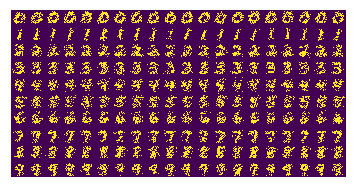

In [18]:
def P10(num_examples):

### STUDENT START ###

    image_length = 28
    image_width = 28
    
    pixel_mean = np.mean(train_data)

    bnb = BernoulliNB(binarize=pixel_mean)
    bnb.fit(train_data, train_labels)

    # pre-allocate array in which to collect example images
    digit_arr = np.zeros((image_length*10,image_width*num_examples))

    for digit in range(0,10): 
    
        for example in range(0,num_examples):
                     
            # Retrieve the set of pixel probabilities predicted by the BernoulliNB classifier for this digit
            this_digit_prob = np.exp(bnb.feature_log_prob_[digit])
            
            # Call method to generate digit image
            gen_image_arr = generate_digit_image(this_digit_prob, image_length, image_width)
    
            # calculate destination start column and row within the collected image
            start_column = example*image_width
            end_column = start_column+image_width
            start_row = digit*image_length
            end_row = start_row+image_length    
            
            # copy the generated image into the collected image
            digit_arr[start_row:end_row,start_column:end_column,] = gen_image_arr
    
    # Setup plot and show examples
    fig, ax = plt.subplots(1,1,sharex=True, sharey=True, 
                              gridspec_kw = {'wspace':0, 'hspace':0})

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('auto')
    ax.axis('off')

    ax.imshow(digit_arr)
    plt.show()
    
    
def generate_digit_image(pixel_prob, image_length, image_width):
    """Given the input pixel probability array, image length and image width, generate an example image from random values
    Args:
        pixel_prob: Array of 784 probabilities, correspondingto 784 (28x28) pixels
        image_length:  length of example images
        image_width:  width of example images
    Returns:
        An image generated from the supplied pixel probabilities
    Raises:
        N/A
    """  
    prob_ind = 0

    gen_image_arr = []

    for pixel_coin_flip in np.random.rand(784):
        if pixel_coin_flip > pixel_prob[prob_ind]:
            gen_image_arr.append(0.0)
        else:
            gen_image_arr.append(1.0)
        prob_ind +=1
                        
    gen_image_arr = np.array(gen_image_arr)
    gen_image_arr.resize((image_length,image_width))
    
    return gen_image_arr
    
### STUDENT END ###

P10(20)

ANSWER: While some of these generated digits are fairly clear and fairly close to the training digits, the random generation has produced some images that are hardly recognizable as digits at all, unless you know what you're looking for.

Perhaps with a larger training dataset these generated images would be a bit sharper.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [19]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    test_bernoulli(buckets, correct, total, mini_train_data, mini_train_labels, dev_data, dev_labels)

def test_bernoulli(buckets, correct, total, training_data, training_labels, devel_data, devel_labels):
    """Perform a Bernoulli test, slotting predictions into a set of buckets and determining accuracy and calibration of a model
    Args:
        buckets: Probability buckets, each with a maximum probability for contained predictions
        correct: An array of correct prediction counts, one for each bucket
        total: An array of total prediction counts, one for each bucket
        training_data: input training data
        training_labels: input training_labels
        devel_data: input development data
        devel_labels: input development labels          
    Returns:
        N/A
    Raises:
        N/A
    """ 
    # Fit a BernoulliNB with alpha=.05, using the training data and labels
    bnb = BernoulliNB(alpha=.05)
    bnb.fit(training_data, training_labels)
    
    # Generate prediction probabilities for development data
    probs = bnb.predict_proba(devel_data)
    
    # For each predicted digit, identify the actual correct digit, example the predicted probabilities and 
    # score the total and correct counters as appropriate.
    for ind in range(0, len(probs)):
        
        actual_digit = devel_labels[ind]
                
        image_probs = probs[ind]
        
        # Determine the maximum probability 
        max_prob = np.max(image_probs)
        
        # Identify the one or more digits predicted with maximum likelyhood for this image
        # There is a possibility that multiple digits could have the same probability.
        # (e.g. 50%+50% or 33%+33%+33%+1%)  
        pred_digits = []
        for idx in range(0, len(image_probs)):
            if image_probs[idx]==max_prob:
                pred_digits.append(idx)
                
        max_bucket_ind = -1
        
        # Step backward from the start, identifying the bucket
        # with maximum probability less than or equal to the identified maximum probability
        for bucket_ind in range(0,len(buckets)):
            if buckets[bucket_ind] >= max_prob:
                max_bucket_ind = bucket_ind
                # Increment the total predictions for the bucket
                total[bucket_ind]+=1
                break
                
        # Iterate through the set of digits predicted with maximum probability.
        # For each, determine if the prediction matched the label. If so, increment
        # the correct count for that bucket. If there was one digit correctly predicted,
        # increment by one, otherwise increment by 1 over the digits with maximum predicted probability.
        for pred_digit in pred_digits:
            if pred_digit == actual_digit:
                correct[max_bucket_ind]+=1
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) <= {:.13f}    total = {:3d}    accuracy = {:.3f}'.format(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   1    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  30    accuracy = 0.367
p(pred) <= 0.9990000000000    total =  74    accuracy = 0.459
p(pred) <= 0.9999900000000    total =  55    accuracy = 0.455
p(pred) <= 0.9999999000000    total =  62    accuracy = 0.629
p(pred) <= 0.9999999990000    total =  41    accuracy = 0.537
p(pred) <= 0.9999999999900    total =  54    accuracy = 0.796
p(pred) <= 0.9999999999999    total =  47    accuracy = 0.787
p(pred) <= 1.0000000000000    total = 636    accuracy = 0.950


ANSWER: While the vast majority the probabilities of predictions are above 90%, the accuracy is quite bad until the last three buckets. The un-calibrated Naive Bayes classifier is known to produce rather inaccurate results.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

Displaying examples of original training data images, for reference...


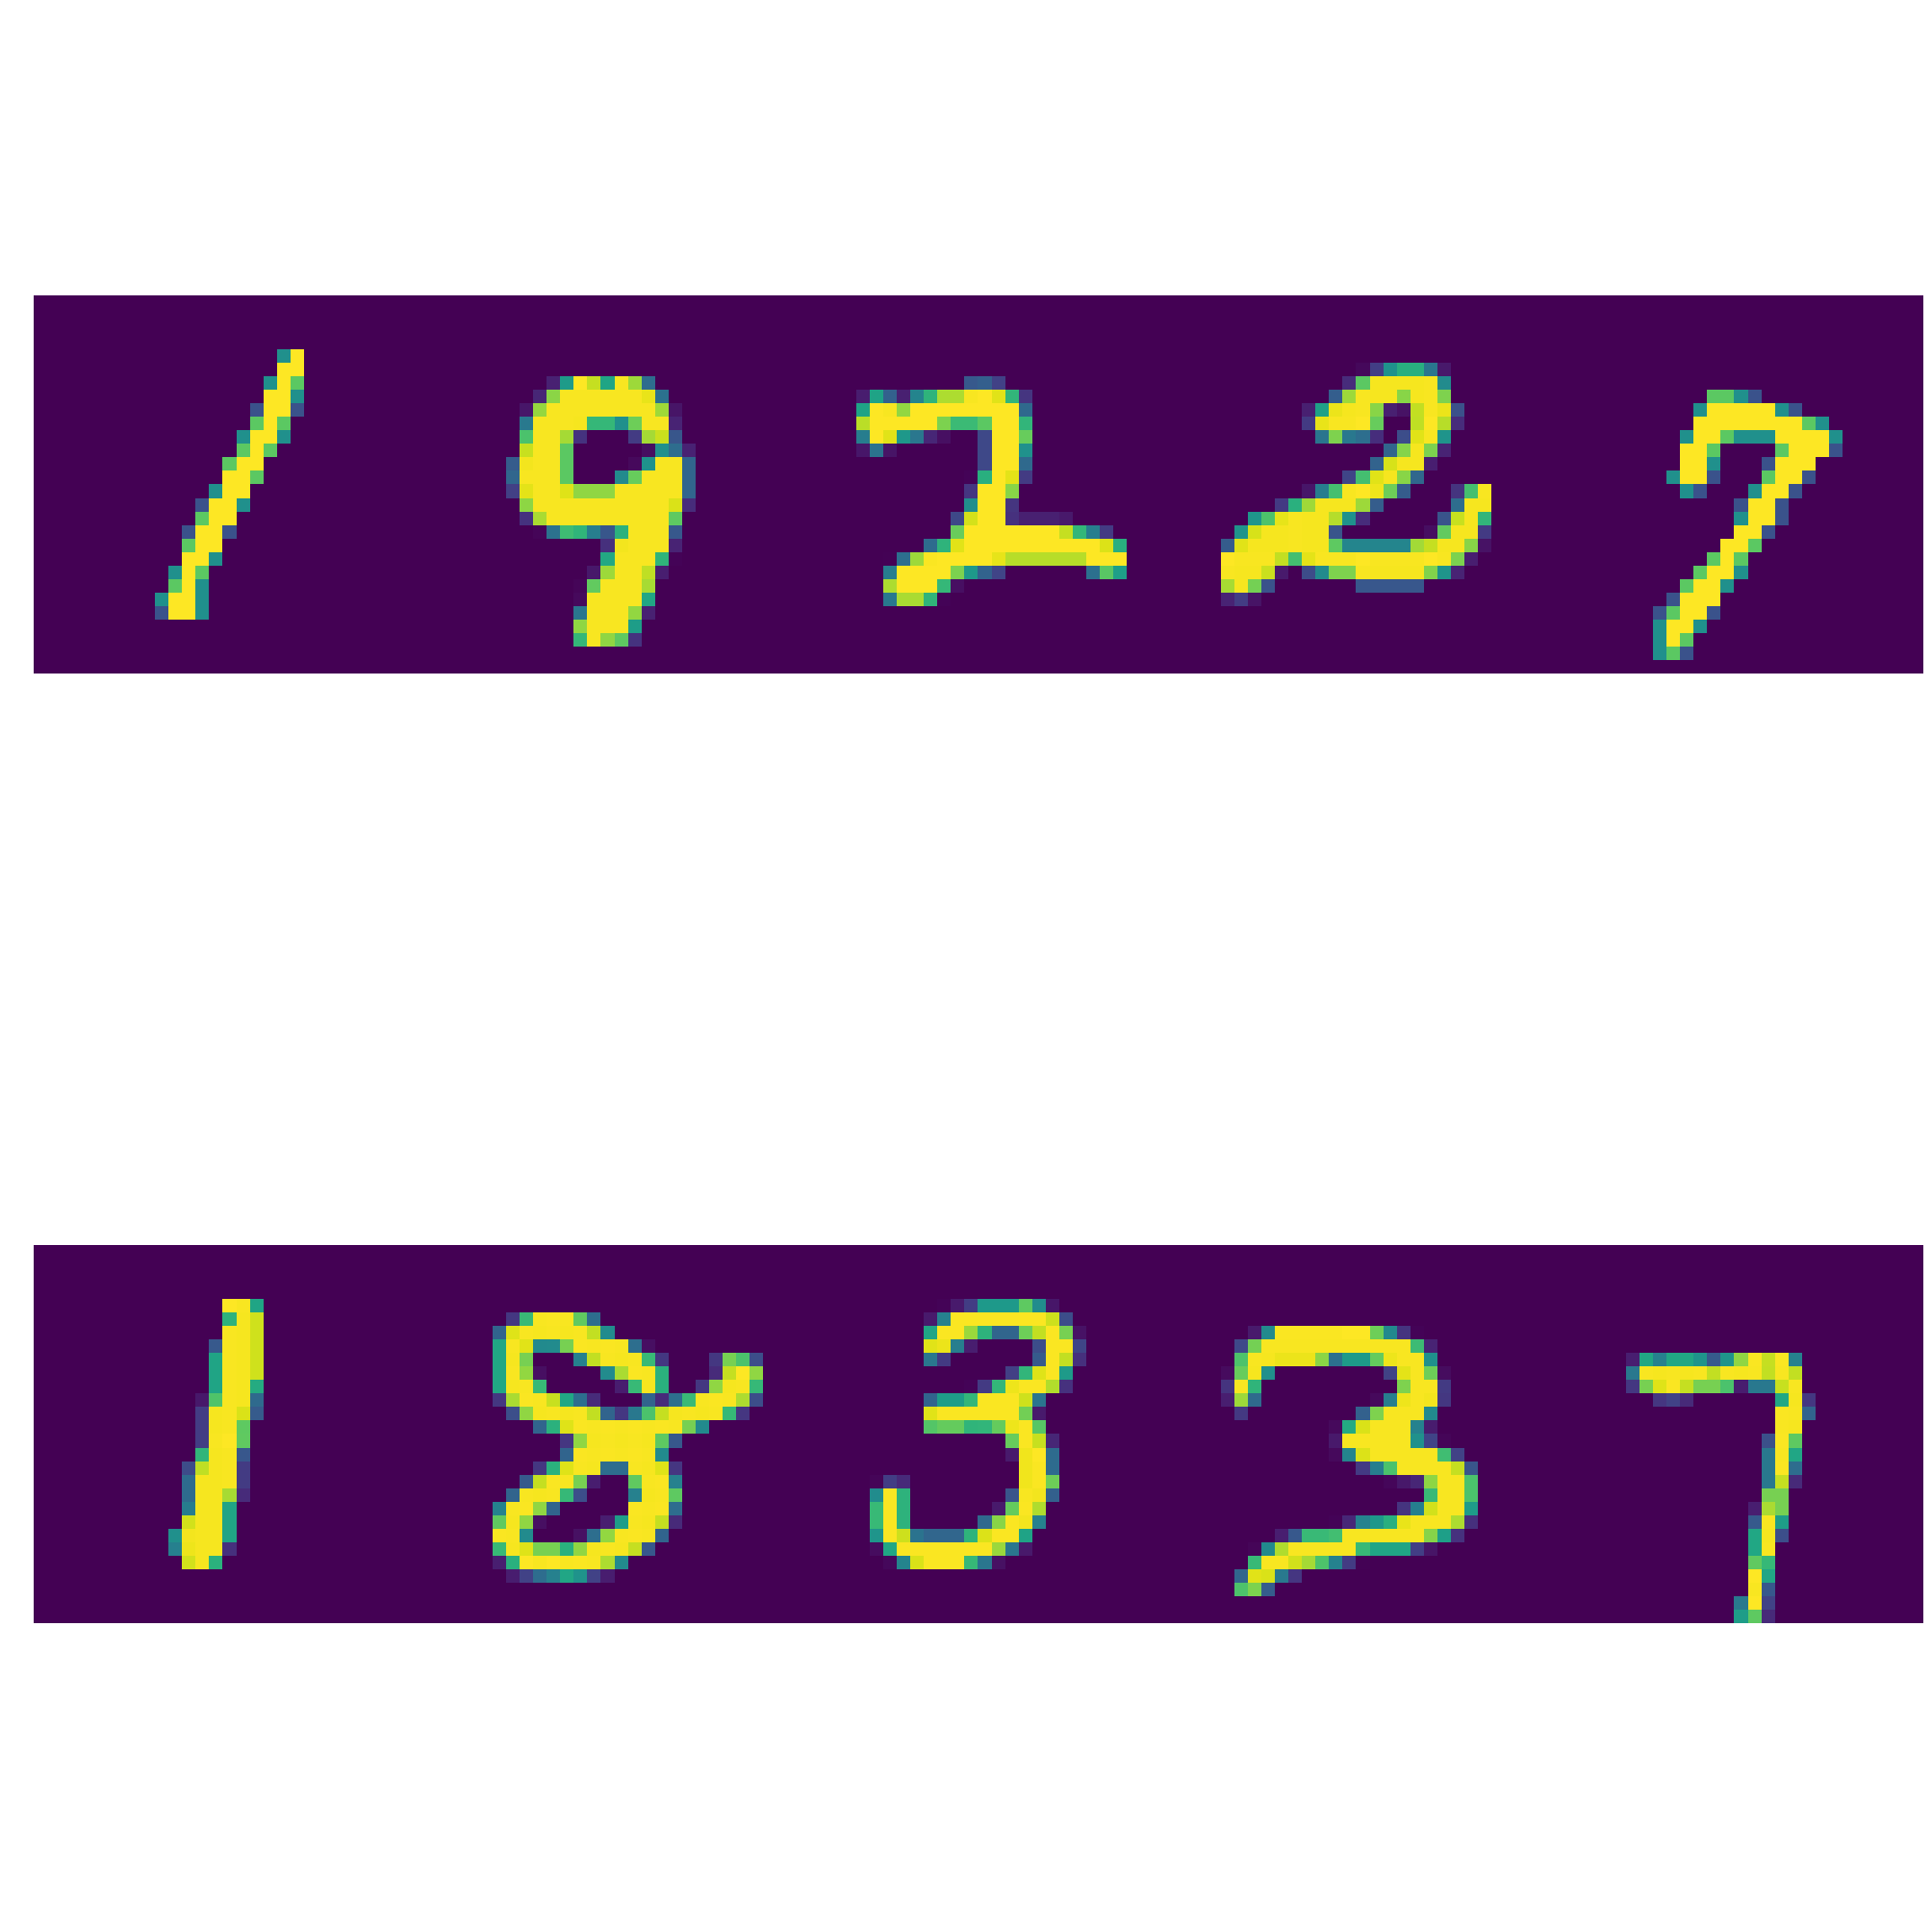

Running Bernoulli test using original datasets (for reference)...


Bernoulli test results:
p(pred) <= 0.5000000000000    total =   1    correct = 0.000 accuracy = 0.000
p(pred) <= 0.9000000000000    total =  30    correct = 11.000 accuracy = 0.367
p(pred) <= 0.9990000000000    total =  74    correct = 34.000 accuracy = 0.459
p(pred) <= 0.9999900000000    total =  55    correct = 25.000 accuracy = 0.455
p(pred) <= 0.9999999000000    total =  62    correct = 39.000 accuracy = 0.629
p(pred) <= 0.9999999990000    total =  41    correct = 22.000 accuracy = 0.537
p(pred) <= 0.9999999999900    total =  54    correct = 43.000 accuracy = 0.796
p(pred) <= 0.9999999999999    total =  47    correct = 37.000 accuracy = 0.787
p(pred) <= 1.0000000000000    total = 636    correct = 604.000 accuracy = 0.950


Enriching images with pixel transition counts in right/bottom margins...


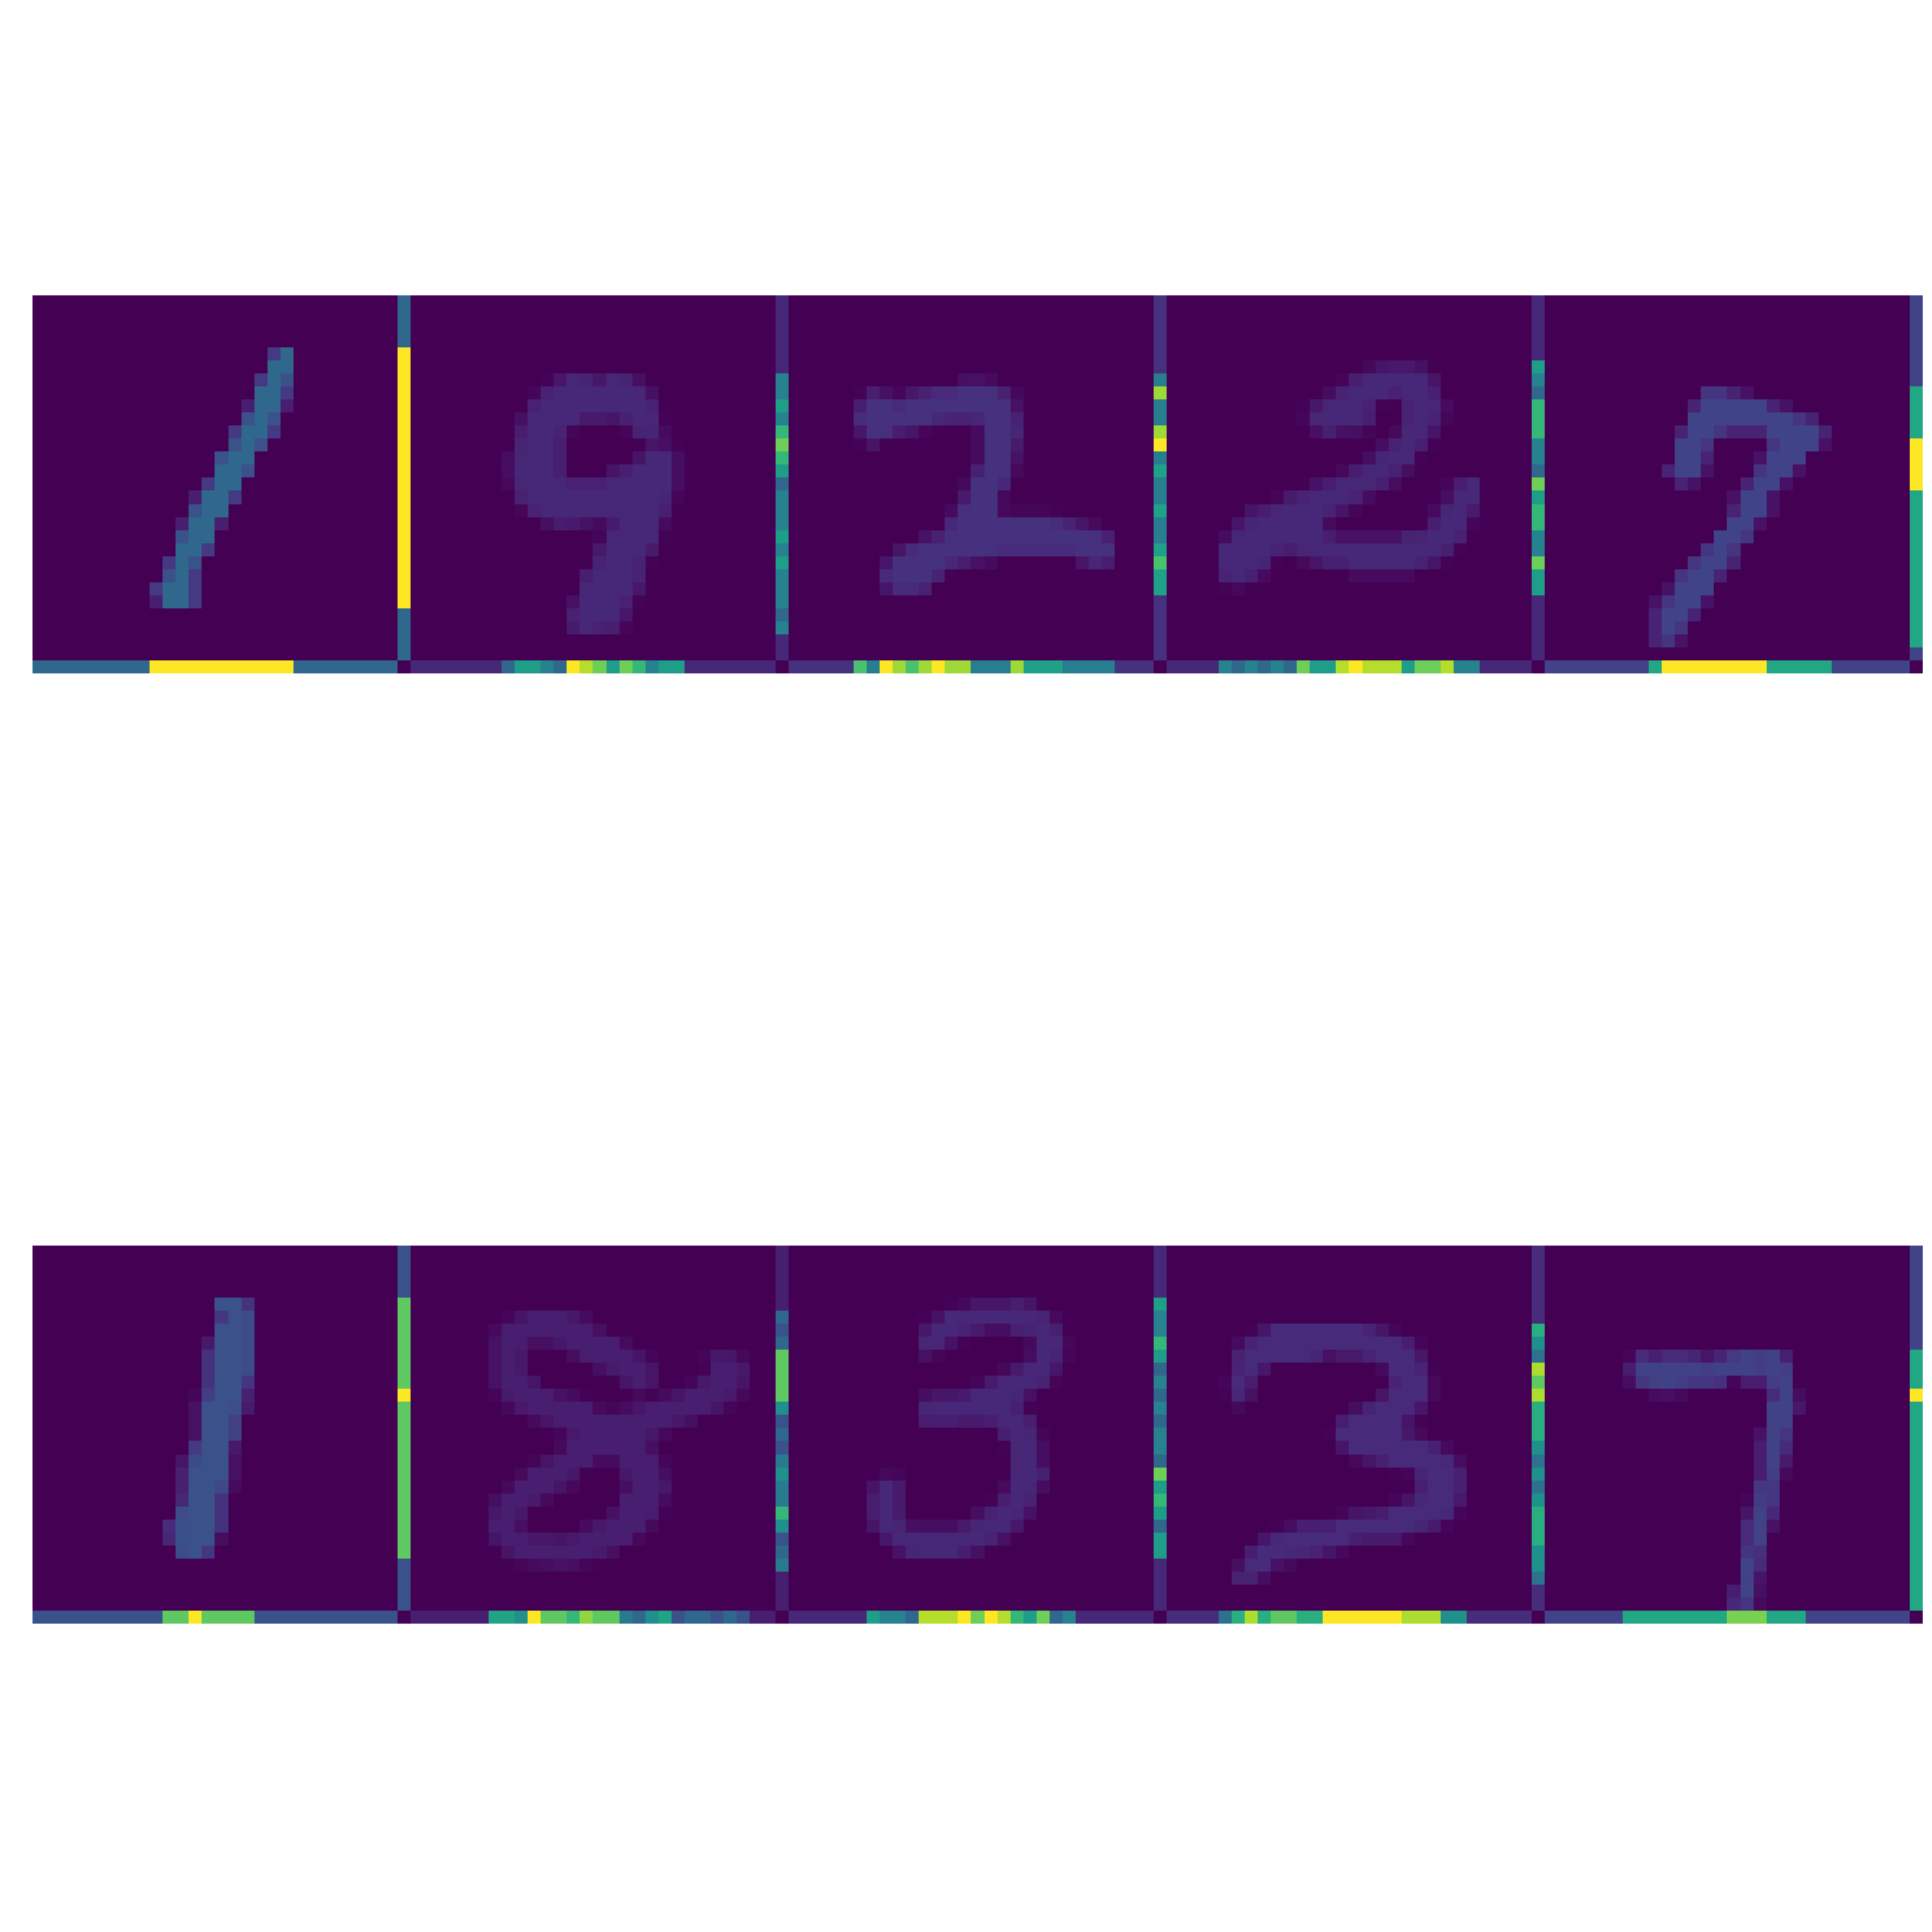

Running Bernoulli test using pixel transition enriched datasets (for comparison)...


Bernoulli test results:
p(pred) <= 0.5000000000000    total =   1    correct = 0.000 accuracy = 0.000
p(pred) <= 0.9000000000000    total =  30    correct = 11.000 accuracy = 0.367
p(pred) <= 0.9990000000000    total =  74    correct = 34.000 accuracy = 0.459
p(pred) <= 0.9999900000000    total =  55    correct = 25.000 accuracy = 0.455
p(pred) <= 0.9999999000000    total =  62    correct = 39.000 accuracy = 0.629
p(pred) <= 0.9999999990000    total =  41    correct = 22.000 accuracy = 0.537
p(pred) <= 0.9999999999900    total =  54    correct = 43.000 accuracy = 0.796
p(pred) <= 0.9999999999999    total =  47    correct = 37.000 accuracy = 0.787
p(pred) <= 1.0000000000000    total = 636    correct = 604.000 accuracy = 0.950


Transforming (landscaping) train data...


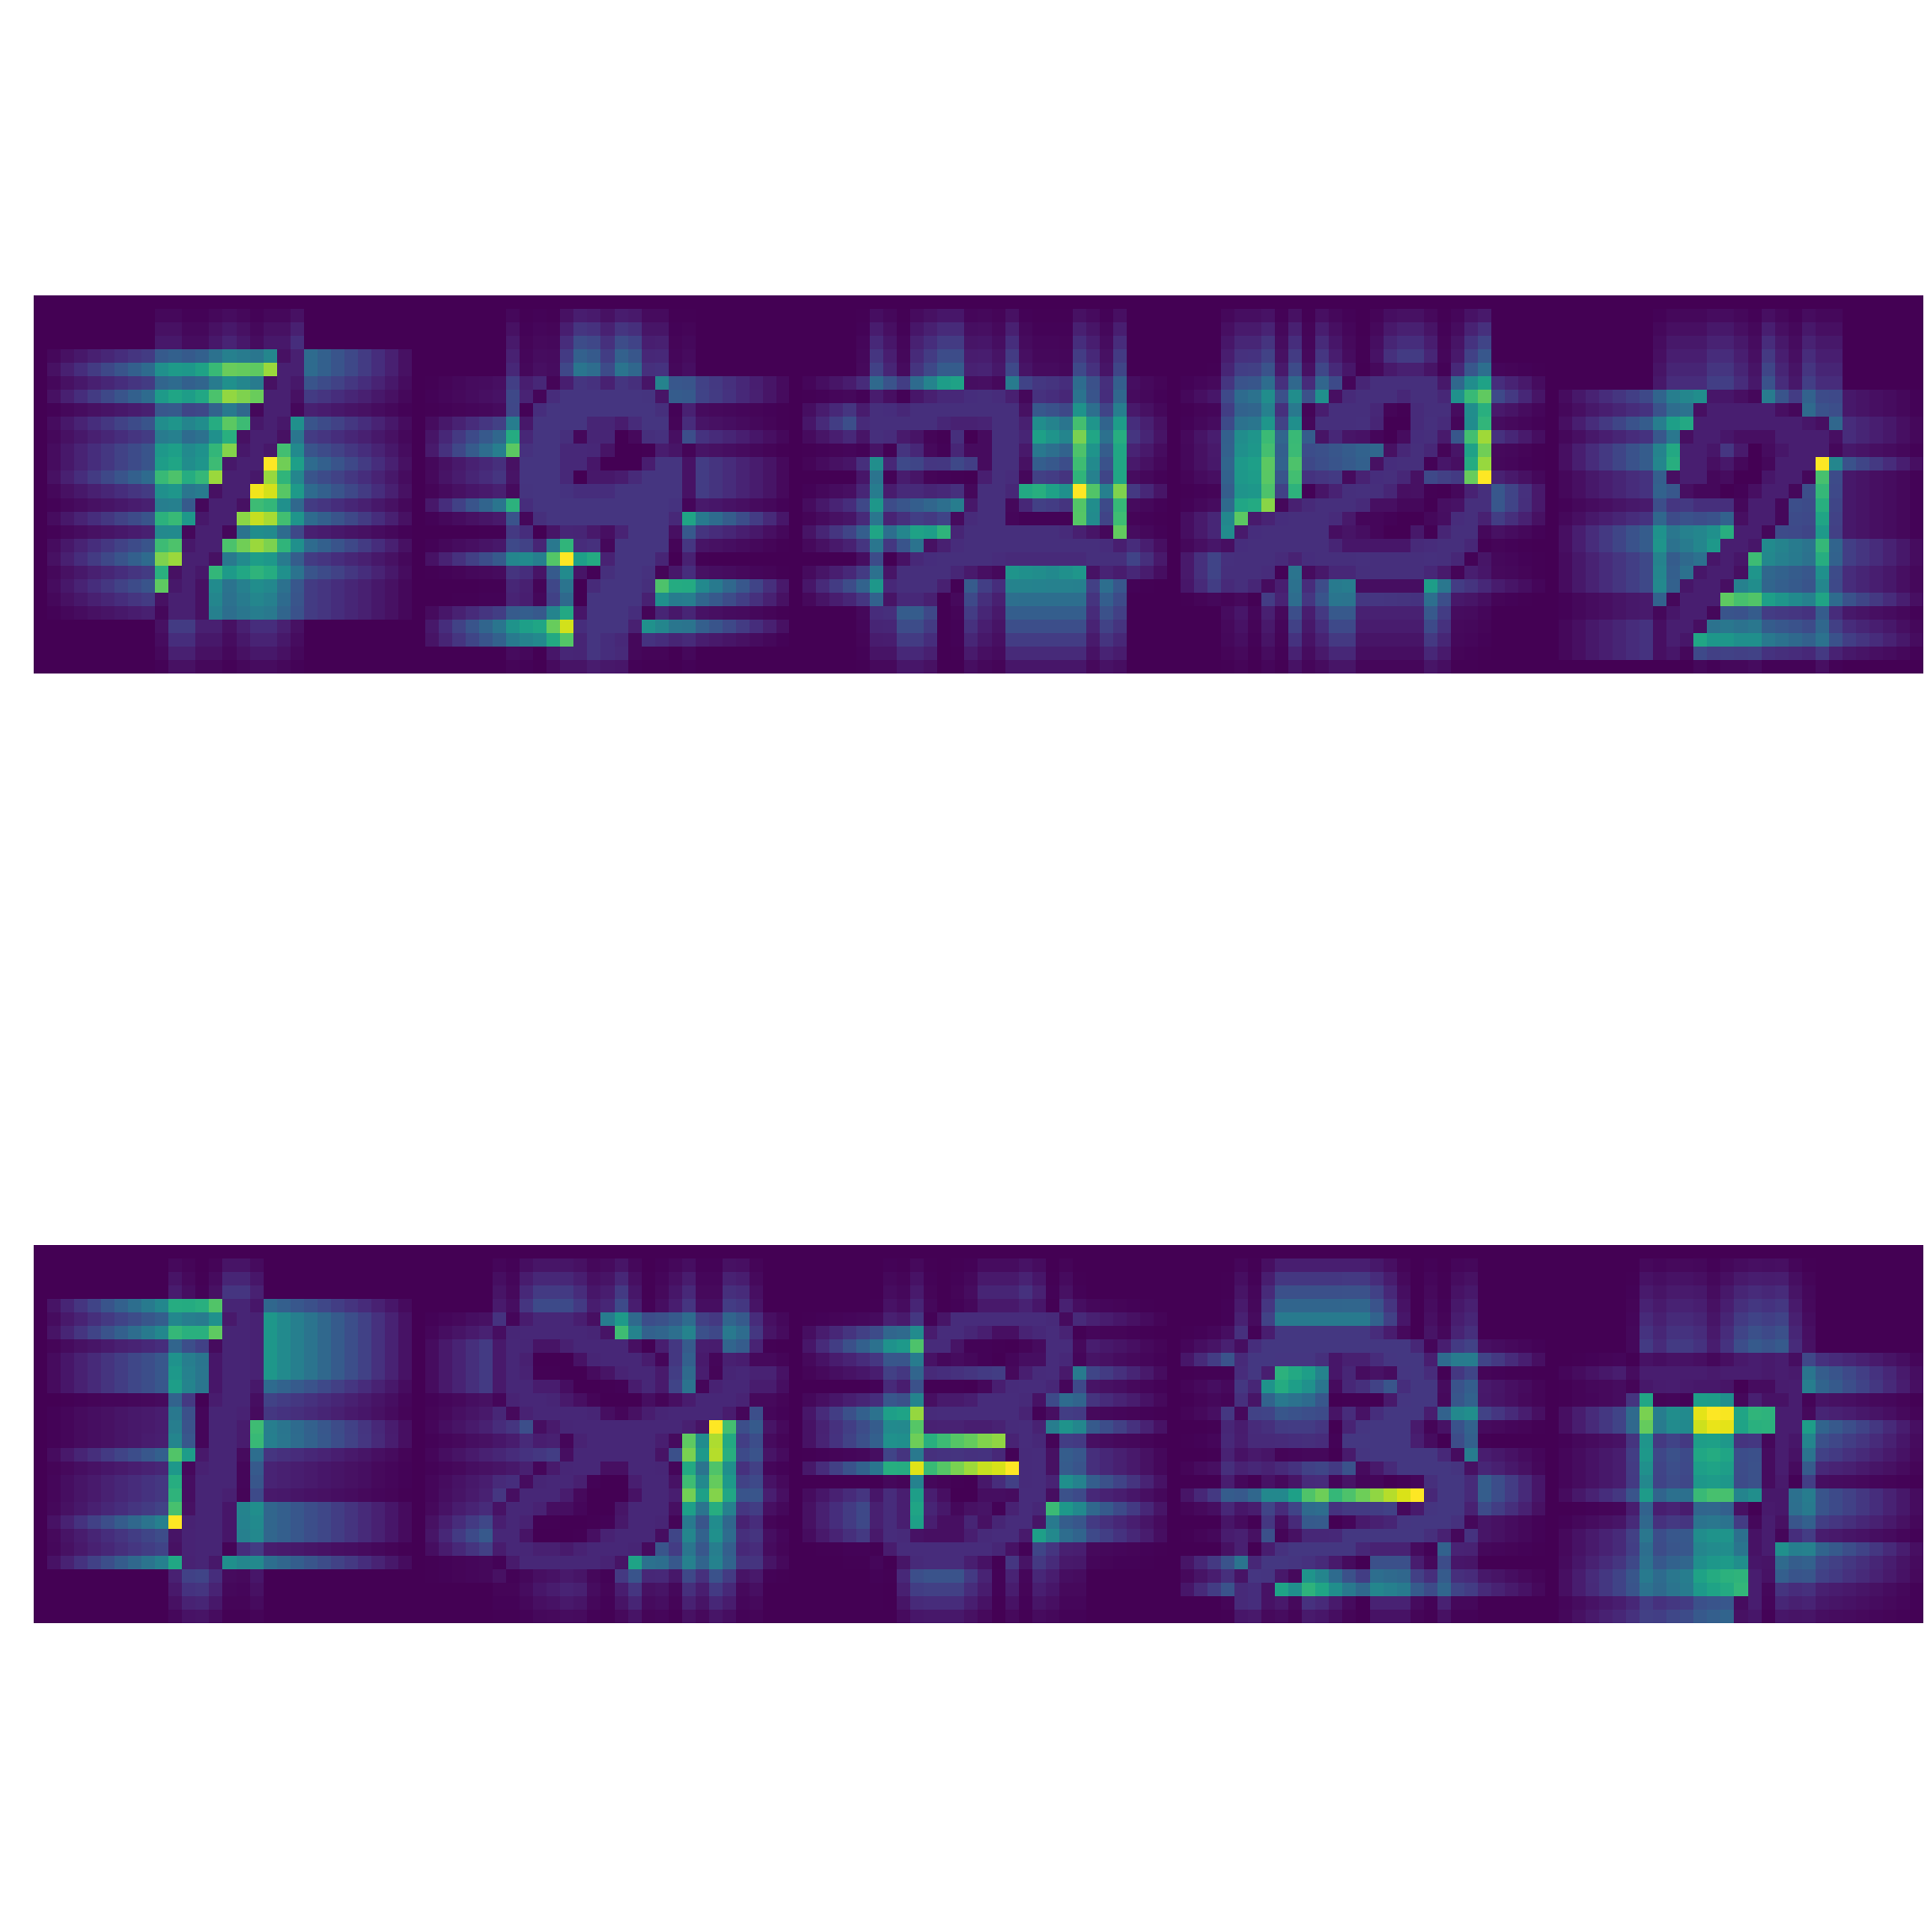

Transforming (landscaping) dev data...
Running Bernoulli test using landscaped datasets (for comparison)...


Bernoulli test results:
p(pred) <= 0.5000000000000    total =   2    correct = 2.000 accuracy = 1.000
p(pred) <= 0.9000000000000    total =  76    correct = 20.000 accuracy = 0.263
p(pred) <= 0.9990000000000    total = 208    correct = 85.000 accuracy = 0.409
p(pred) <= 0.9999900000000    total = 159    correct = 67.000 accuracy = 0.421
p(pred) <= 0.9999999000000    total =  99    correct = 52.000 accuracy = 0.525
p(pred) <= 0.9999999990000    total =  67    correct = 45.000 accuracy = 0.672
p(pred) <= 0.9999999999900    total =  41    correct = 25.000 accuracy = 0.610
p(pred) <= 0.9999999999999    total =  55    correct = 34.000 accuracy = 0.618
p(pred) <= 1.0000000000000    total = 293    correct = 248.000 accuracy = 0.846


In [20]:
def P12():

### STUDENT START ###

    # These variables are copied from above, for testing these different transformations of the data
    buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
    correct = [0 for i in buckets]
    total = [0 for i in buckets]

    print("Displaying examples of original training data images, for reference...")
    
    display_image_examples(mini_train_data, 5, 2)
    
    print("Running Bernoulli test using original datasets (for reference)...")
    test_bernoulli(buckets, correct, total, mini_train_data, mini_train_labels, dev_data, dev_labels)
    
    print("\n\nBernoulli test results:")
    for i in range(len(buckets)):
        accuracy = 0.0
        if (total[i] > 0): accuracy = correct[i] / total[i]
        print('p(pred) <= {:.13f}    total = {:3d}    correct = {:.3f} accuracy = {:.3f}'.format(buckets[i], total[i], correct[i], accuracy))

    pixel_mean = np.mean(mini_train_data)


    segment_counts_tests = True
    
    if (segment_counts_tests):

        # Resetting the test variables, in preparation for testing the next transformation
        buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
        correct = [0 for i in buckets]
        total = [0 for i in buckets]
        
        # These two lists will be used to collect enhanced images, with segment trainsition counts in the last row and column
        better_train_data = []
        better_dev_data = []

        pixel_mean = np.mean(mini_train_data)
    
        print("\n\nEnriching images with pixel transition counts in right/bottom margins...")
        for img in mini_train_data:
            better_train_data.append(gen_segment_map(img))
        
        better_train_data = np.array(better_train_data)
        better_train_data = better_train_data.reshape((1000,841))
    
        display_image_examples(better_train_data, 5, 2, (29,29))
    
        for img in dev_data:
            better_dev_data.append(gen_segment_map(img))
        
        better_dev_data = np.array(better_dev_data)
        better_dev_data = better_dev_data.reshape((1000,841))
    
    
        print("Running Bernoulli test using pixel transition enriched datasets (for comparison)...")

        # Run the above defined BernoulliNB test to determine the accuracy and prediction capability with this enrichment
        test_bernoulli(buckets, correct, total, better_train_data, mini_train_labels, better_dev_data, dev_labels)
    
        print("\n\nBernoulli test results:")
        for i in range(len(buckets)):
            accuracy = 0.0
            if (total[i] > 0): accuracy = correct[i] / total[i]
            print('p(pred) <= {:.13f}    total = {:3d}    correct = {:.3f} accuracy = {:.3f}'.format(buckets[i], total[i], correct[i], accuracy))

    
    # Another approach will be to replace the 'zero' segments with quadratic curves that slope gradually until near an
    # adjacent 'large' segment, at which point the curve will climb rapidly. This should change all the zeros with
    # features that point to the nearest non-blank pixel.

    # These two lists will be used to collect enhanced images, with zero segments converted to gentle plains and slopes

    landscape_train_data = np.array([])

    landscape_dev_data = np.array([])
    
    
    # Producing transformed image datasets (train/dev) with sequences of zeros replaced by curves to non-zero pixels
    print("\n\nTransforming (landscaping) train data...")
    for img in mini_train_data:
        
        img = img.reshape((28,28))
        sloped_image = landscape_image(img, pixel_mean)
        sloped_image.reshape(784)
        
        landscape_train_data = np.append(landscape_train_data,sloped_image)
        
    landscape_train_data = landscape_train_data.reshape((1000,784))
    
    display_image_examples(landscape_train_data, 5, 2)
    
    print("Transforming (landscaping) dev data...")
    for img in dev_data:
        
        img = img.reshape((28,28))
        sloped_image = landscape_image(img, pixel_mean)
        sloped_image = sloped_image.reshape(784)
        
        landscape_dev_data = np.append(landscape_dev_data,sloped_image)
        
    landscape_dev_data = landscape_dev_data.reshape((1000,784))


    # These variables are copied from above, for testing these different transformations of the data
    buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
    correct = [0 for i in buckets]
    total = [0 for i in buckets]
        
        
    print("Running Bernoulli test using landscaped datasets (for comparison)...")

    test_bernoulli(buckets, correct, total, landscape_train_data, mini_train_labels, landscape_dev_data, dev_labels)
    
    print("\n\nBernoulli test results:")
    for i in range(len(buckets)):
        accuracy = 0.0
        if (total[i] > 0): accuracy = correct[i] / total[i]
        print('p(pred) <= {:.13f}    total = {:3d}    correct = {:.3f} accuracy = {:.3f}'.format(buckets[i], total[i], correct[i], accuracy))

def display_image_examples(image_data_arr, columns, rows, image_dimensions=(28,28)):
    """Display a set of example images with various types of transformations
    Args:
        image_data_arr:  array of image data arrays, to be displayed  
        columnns
        rows:
        image_dimensions:  Dimensions for each image
    Returns:
        N/A
    Raises:
        N/A
    """ 
    # Prepare a set of axes for displaying the example images.
    fig, axarr = plt.subplots(rows,columns,sharex=True, sharey=True, 
                              gridspec_kw = {'wspace':0, 'hspace':0}, 
                              figsize = image_dimensions)

    # Display ten example images with transition counts enrhcnments
    # Iterate through example columns
    for example in range(0,columns):

        # Iterate through the rows
        for row in range(0,rows):                

            # Use the first 10 enriched images as examples
            example_image_arr = image_data_arr[5*row+example]
            example_image_arr = example_image_arr.reshape(image_dimensions)

            # Setup the Axes instance and display with no axis or tick marks
            ax = axarr[row][example]
            ax.axis('off')
            ax.set_aspect('auto')
            ax.imshow(example_image_arr)

    plt.tight_layout()
    plt.show()

        
debug = False

# This section of the code contains methods in support of generating a segment transition map.
# These are transitions from blank (zero) to non-blank (small or large). These methods are insupport
# of enriching digit images with counts of the per-row and per-column segment transitions, in the right and
# bottom margins.

def gen_segment_map(img_arr):
    """Generate an image with a segment count map in an extra right-hand column and extra bottom row
    Args:
        img_arr: input image to process as source for the segment counts
    Returns:
        Image (arr) with extra column and row containing segment count mappingss
    Raises:
        N/A
    """ 
    img_arr = np.array(img_arr)
    img_arr = img_arr.reshape((28,28))
    pixel_mean = np.mean(img_arr)
    
    # Iterate through the rows, capturing a count of pixel segment transitions for each
    row_segs = []    
    for row in range(0,28):
        row_segs.append(get_segment_count(img_arr[row,], pixel_mean))
    
    row_segs = np.array([row_segs])
    row_segs = row_segs.reshape(28,1)

    # Iterate through the columns, capturing a count of pixel segment transitions for each
    col_segs = []
    for col in range(0,28):
        col_segs.append(get_segment_count(img_arr[...,col], pixel_mean))
        
    col_segs = np.array([col_segs])
        
    # Add a final 0 for the lower right corner of the extended array, since we will already have added a
    # column with segment counts
    col_segs = np.append(col_segs,0)
    col_segs = col_segs.reshape(1,29)

    # Append to the image a column containing counts of the segments in each row
    img_arr = np.concatenate((img_arr, row_segs), 1)

    # Append to the image a row containing counts of the segments in each column
    img_arr = np.concatenate((img_arr, col_segs), 0)
    
    return img_arr


# Return the count of the different segments in the input sequence of items
def get_segment_count(items, pixel_mean):
    """Get the count of pixel segment transitions in a given set of pixels (items). These could be from a column or a row.
    Args:
        items:  list of pixel values
        pixel_mean:  image mean of pixel values, used for identifying pixel segments.
    Returns:
        A count of the segments identified in a set of pixels
    Raises:
        N/A
    """ 
    segments = get_segments(items, pixel_mean)
    return len(segments)


# Collect a set of 'segments' each of which are a different class of values
# A 'zero' segment is a string of 0 values, a 'small' segment is a sequence of
# values less than the pixel mean, and a 'large' segment is a sequence of values
# greater than the pixel mean. 
def get_segments(items, pixel_mean):
    """Collect a set of 'segments' each of which are a different class of values.
    A 'zero' segment is a string of 0 values, a 'small' segment is a sequence of values less than the pixel mean,
    and a 'large' segment is a sequence of values greater than the pixel mean. 
    Args:
        items:  list of pixel values
        pixel_mean:  image mean of pixel values, used for identifying pixel segments.
    Returns:
        A set of identified segments (containing values) from the pixel items
    Raises:
        N/A
    """     
    if debug:
        print("get_segments({}): {}".format(len(items),items))

    # Initialize the lists used for accumulating segments, items and types
    segments = []
    current_segment = []
    segment_type = None
    last_segment_type = None
    last_item = None
                   
    # Iterate through the pixel items identifying segments (sequences of similar values)
    for item in items:
        segment_type = get_segment_type(item, pixel_mean)
        
        if (last_item is not None):
            last_segment_type = get_segment_type(last_item, pixel_mean)

        # If this character represents a different segment type than last we saw, save the current values in segment
        # and create a fresh new current_segment for this new type of values.
        if segment_type != last_segment_type:
            if last_segment_type is not None:
                segments.append([last_segment_type,current_segment])
            current_segment = []
        
        current_segment.append(item)
            
        last_item = item
    
    # Add the last item to the segment and the segment to the collection
    if len(current_segment)>0:
        segments.append([last_segment_type, current_segment])
        
    return segments

def get_segment_type(item, pixel_mean):
    """Simple mapping of pixel value to segment type, either 'zero', 'small' for less than mean and 'large' for others
    Args:
        items:  Single pixel value
        pixel_mean:  image mean of pixel values, used for identifying pixel segments.
    Returns:
        Segment type associated with the pixel value
    Raises:
        N/A
    """ 
    if (item is not None):
        if (item == 0):
            return 'zero'
        elif item < pixel_mean:
            return 'small'
        else:
            return 'large'
    else:
        return None

    
# This section of code is the implementation of the "landscape" enrichment feature, which is the replacement of
# blank (zero) sequences in images with curves that rise slowly and then rise very rapidly upon approaching the
# next non-blank segment.

def landscape_image(img_arr, pixel_mean):
    """Transform input image into "landscaped" returned image, with 'zero' sequences replaced by curves up to adjacent
    non-zero values.
    Args:
        img_arr:     image to be transformed
        pixel_mean:  image mean of pixel values, used for identifying pixel segments.
    Returns:
        Transformed image, with curves instead of so many zeros 
    Raises:
        N/A
    """
    row_scaped_arr = None
    col_scaped_arr = None
    
    for row in range(0,28):
        row_body = np.array(img_arr[row,])
    
        row_segments = get_segments(row_body, pixel_mean)
        landscaped_row = landscape_segments(row_segments)
        
        landscaped_row = np.array(landscaped_row)
        landscaped_row = landscaped_row.reshape(1,-1)
        
        if row_scaped_arr is None:
            row_scaped_arr = landscaped_row
        else:
            row_scaped_arr = np.concatenate([row_scaped_arr, landscaped_row])        
        
    for col in range(0,28):
        column = img_arr[...,col]
        col_segments = get_segments(column, pixel_mean)
        landscaped_col = landscape_segments(col_segments)
        
        landscaped_col = np.array(landscaped_col)
        landscaped_col = landscaped_col.reshape(-1,1)

        if col_scaped_arr is None:
            col_scaped_arr = landscaped_col
        else:
            col_scaped_arr = np.concatenate([col_scaped_arr, landscaped_col],1)

    landscape_arr = (row_scaped_arr + col_scaped_arr)/2
    
    return landscape_arr

def landscape_segments(input_segments):
    """Transform input segments into "landscaped" returned segments, with 'zero' sequences replaced by curves up to adjacent
    non-zero values.
    Args:
        input_segments: segments to be transformed
    Returns:
        Transformed (landscaped) segments, with curves instead of so many zeros 
    Raises:
        N/A
    """    
        
    landscaped_segments = np.array([])
    last_segment = None
    next_segment = None
        
    for segment_ind in range(0,len(input_segments)):
        if segment_ind == 0:
            last_segment = None
        else:
            last_segment = input_segments[segment_ind-1]
            
        if segment_ind+1 == len(input_segments):
            next_segment = None
        else:
            next_segment = input_segments[segment_ind+1]

        one_landscaped_segment = create_landscape_segment(last_segment, input_segments[segment_ind], next_segment)
        
        if (one_landscaped_segment is not None):
            landscaped_segments = np.concatenate([landscaped_segments,one_landscaped_segment])

    return landscaped_segments


def create_landscape_segment(last_segment, current_segment, next_segment):
    """Create single landscaped segment, transforming the current_segment based on its values along with those in the
    last_segment and next_segment.

    Args:
        last_segment:  Prior segment to the current_segment, if there is one.
        current_segment:  Pixel transition segment currently be analyzed for transformation.
        Next_segment:  Following segment to the current_segment, if there is one.
    Returns:
        Transformed (landscaped) segment, with curves instead of so many zeros 
    Raises:
        N/A
    """    

    # Extract each segment's type and body, which are first and second array elements in each
    
    if last_segment is not None:
        last_segment_type = last_segment[0]
        last_segment_body = last_segment[1]
    else:
        last_segment_type = None
        
    if next_segment is not None:
        next_segment_type = next_segment[0]
        next_segment_body = next_segment[1]
    else:
        next_segment_type = None
        
    current_segment_type = current_segment[0]
    current_segment_body = current_segment[1]
    
    if debug:
        print("create_landscape_segment:")
        if last_segment is None:
            print("last_segment(None)")
        else:
            print("last_segment_body({}) : {}".format(len(last_segment_body), last_segment_body))

        print("current_segment_body({}) : {}".format(len(current_segment_body), current_segment_body))

        if next_segment is None:
            print("next_segment(None)")
        else:
            print("next_segment_body({}) : {}".format(len(next_segment_body), next_segment_body))


    previous_value = 0
    next_value = 0
        
    # For the zero segments, replace the zeros with a curve that slopes up at the ends next to non-zero segments 
    if current_segment_type == 'zero':
        
        if last_segment != None:
            
            # If there is a previous segment, the last value of that segment will be sloped up to at the start
            # of the curve replacing the zero segment 
            previous_value = last_segment_body[len(last_segment_body)-1]
        
        
        if next_segment != None:
            
            # If there is a next segment, the first value of that segment will be sloped up to at the end
            # of the curve replacing the zero segment 
            next_value = next_segment_body[0]                
                
        # Some rows will be zeros all the way across, in which case there will be no curve transformation,
        # instead returning the original sequnce of zeros unaltered
        if (((last_segment is None) and (next_segment is None)) or (len(current_segment)==1)):
            landscape_segment = current_segment_body            
        else:
            landscape_segment = create_curve(previous_value, current_segment_body, next_value)
            
    # For the non-zero segments, simply return the original sequence of cells unaltered
    else:
        landscape_segment = current_segment_body
        
    
    return np.array(landscape_segment)

# Create a curve as a replacement for a zero segment, curving up at either/both ends as appropriate for
# non-zero previous_value and/or next_value
def create_curve(previous_value, current_segment_body, next_value):
    """Create a curve to replace a sequence of zeros. The previous_value and next_value will determine whether the
    curve slopes up on one or both ends, and how much,

    Args:
        previous_value:  final value in prior segment to the current_segment, if there is one.
        current_segment:  Pixel transition segment currently be analyzed for transformation.
        Next_segment:  first value in the segment following the current_segment, if there is one.
    Returns:
        Curve replacing a single zero segment. 
    Raises:
        N/A
    """ 
    length = len(current_segment_body)

    # Return if there's only a single value, since there is no curve to be created
    if length<2:
        return current_segment_body
    
    # For both values are the same, split the current segment in half and curve up at both ends
    if (previous_value !=0) and (next_value != 0):
        
        curve_length = int(float(len(current_segment_body)) / 2.0)
        first_curve = create_curve(previous_value, current_segment_body[:curve_length], 0)
        second_curve = create_curve(0, current_segment_body[-curve_length:], next_value)
        
        if debug:
            print("create_curve:")
            print("second_curve({}) : {}".format(len(second_curve), second_curve))
            
        # A segment with an odd number of zeros will be replaced by a segment with two equal-length
        # curves at each and and a zero in the center
        if 2*curve_length < len(current_segment_body):
            first_curve = np.concatenate([first_curve, np.array([0.0])])

        if debug:
            print("first_curve({}) : {}".format(len(first_curve), first_curve))        

        landscape_curve = np.concatenate([first_curve, second_curve])
        
        if debug:
            print("landscape_curve({}) : {}".format(len(landscape_curve), landscape_curve))
    
    else:
        landscape_curve = np.array([])
        
        length = len(current_segment_body)
                  
        # In this case, the curve will slope up at the start, to meet the previous value.
        if (previous_value>0):
            
            value_arr = []
            for ind in range(0,length):
                value_arr.append((length-ind+0.01)*previous_value)
                
            landscape_curve = np.concatenate([landscape_curve, value_arr])
             
        if (next_value>0):
            
            # In this case, next value will be greater than zero, so the curve will slope up at the right end
            value_arr = []
            for ind in range(0,length):
                value_arr.append((ind+0.01)*next_value)
            
            landscape_curve = np.concatenate([landscape_curve, value_arr])
        
    return landscape_curve
    

        




### STUDENT END ###

    
P12()

ANSWER: I tried two different approaches to adding features to the image data. The first approach was to calculate the total number of picture segments in each row and each column, storing the row counts in an added column to the rights and storing the column counts in an added row below the bottom of the image.

The second approach was to "landscape" the images, replacing all the sequences of multiple zeros with gentle curves that gradually accelerate their climb as they approach non-zero segments.

The first approach did not produce better values with the bernoulli test. And, the second approach produced much worse prediction and accuracy values. But, these were valuable exercises, even if they didn't produce better results.